# Social Media Analysis and Forecasting

This notebook demonstrates how to perform social media analysis and content forecasting for the Instagram profile "datasciencebrain" using `instaloader`.


## Import Necessary Libraries

In [1]:
import instaloader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Download Profile Data Using Instaloader

In [2]:
L = instaloader.Instaloader()
profile_name = 'datasciencebrain'
profile = instaloader.Profile.from_username(L.context, profile_name)

## Data Preprocessing

In [3]:
posts_data = []
for post in profile.get_posts():
    posts_data.append({
        "post_id": post.shortcode,
        "likes": post.likes,
        "comments": post.comments,
        "date": post.date,
        "caption": post.caption,
        "is_video": post.is_video,
        "video_views": post.video_view_count if post.is_video else 0,
        "url": post.url
    })

df_posts = pd.DataFrame(posts_data)

## Exploratory Data Analysis (EDA)

C:\Users\RAGHAVENDRASIDDIREDD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAGHAVENDRASIDDIREDD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


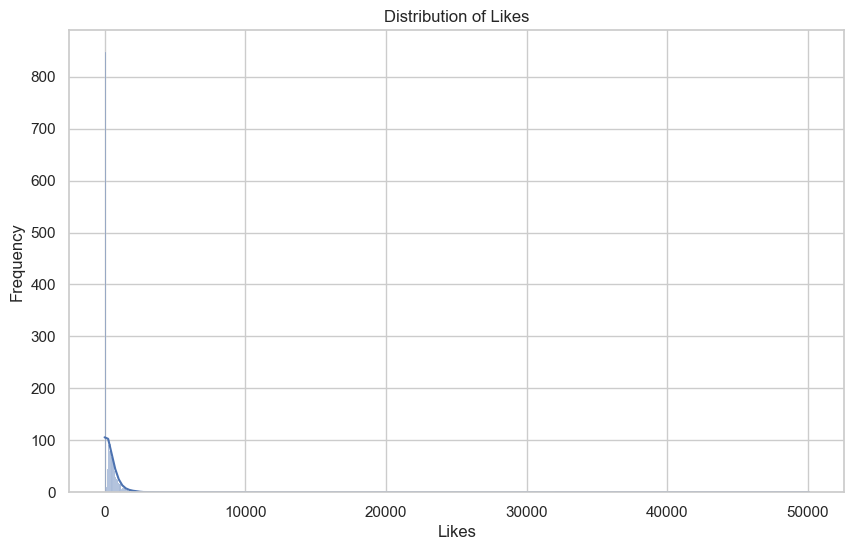

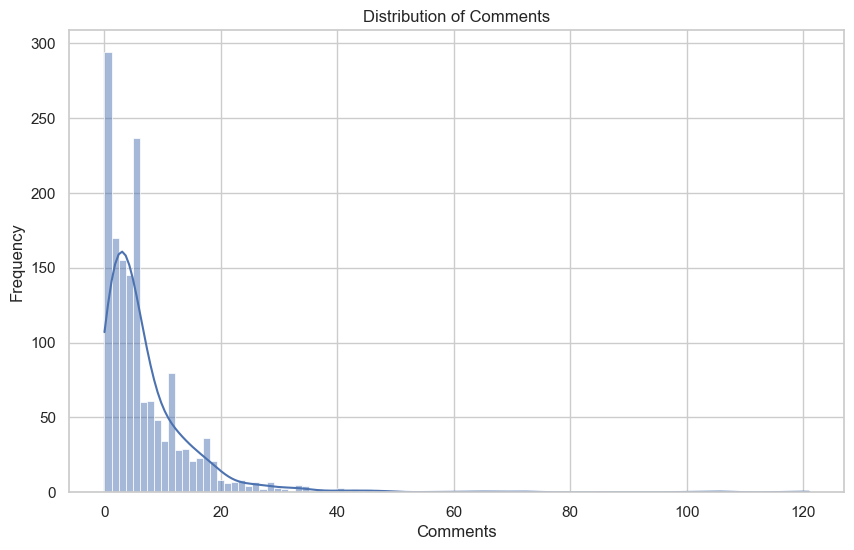

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_posts['likes'], kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')

plt.figure(figsize=(10, 6))
sns.histplot(df_posts['comments'], kde=True)
plt.title('Distribution of Comments')
plt.xlabel('Comments')
plt.ylabel('Frequency')
plt.show()

## Model Training for Forecasting

In [5]:
X = df_posts[['comments']]
y = df_posts['likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8039939.901372847


## Forecasting and Prediction

In [6]:
new_comments = [[50]]  # Example: New post expected to receive 50 comments
predicted_likes = model.predict(new_comments)
print(f"Predicted Likes: {predicted_likes[0]}")

Predicted Likes: 1238.0792422855234


C:\Users\RAGHAVENDRASIDDIREDD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
